In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("../data/clean/billboard_2000_2017_spotify_clean.csv")
df = df[['date','year','simple_title','main_artist','peak_pos','weeks','danceability','spotify_id','broad_genre',
         'loudness','energy','acousticness','speechiness','duration_ms','valence','weeks']]
df.head(20)

,date,year,simple_title,main_artist,peak_pos,weeks,danceability,spotify_id,broad_genre,loudness,energy,acousticness,speechiness,duration_ms,valence,weeks
0,1/8/00,2000,the christmas song,christina aguilera,18,4,0.392,2BNV1D5X4ioefyOE0uDFOL,r&b,-8.452,0.3,0.884,0.0329,264960,0.147,4
1,9/2/00,2000,oops!...i did it again,britney spears,9,20,0.751,6naxalmIoLFWR0siv8dnQQ,r&b,-5.444,0.834,0.3,0.0437,211160,0.894,20
2,9/2/00,2000,smooth,santana,1,58,0.609,0n2SEXB2qoRQg171q7XqeW,rock,-3.908,0.923,0.16,0.0338,294987,0.961,58
3,9/2/00,2000,the one,backstreet boys,30,15,0.689,6e40mgJiCid5HRAGrbpGA6,pop,-5.642,0.702,0.216,0.0261,213600,0.484,15
4,9/2/00,2000,where i wanna be,donell jones,29,20,0.664,2uZwyxrg6VPvlVsvclIfel,r&b,-9.131,0.396,0.52,0.0298,253627,0.453,20
5,8/26/00,2000,cold day in july,dixie chicks,65,10,0.574,2dtitppHZmA0MxLZ3Giq3o,country,-10.644,0.368,0.0163,0.0271,312693,0.296,10
6,8/26/00,2000,i think god can explain,splender,62,12,0.48,3YW5qaMNCsMnta8L0j1btB,rock,-4.398,0.729,0.0129,0.028,236760,0.509,12
7,8/26/00,2000,the chain of love,clay walker,40,20,0.533,68AhslXGVDKUUyHnDkORGF,country,-14.349,0.315,0.235,0.0308,304507,0.316,20
8,8/26/00,2000,west side story,lfo,84,4,0.691,4KJKJUetg7Gs3e0MAoSIzX,unknown,-3.884,0.792,0.0961,0.0509,208160,0.302,4
9,8/19/00,2000,amazed,lonestar,1,55,0.557,6iNcyWk5iUEY7P9zeTc5hm,country,-7.954,0.553,0.247,0.0319,239987,0.253,55


In [3]:
cond = (df['danceability'] != 'unknown') & (df['energy'] != 'unknown')
df = df[cond]
genres = df['broad_genre'].unique()
df.head()

,date,year,simple_title,main_artist,peak_pos,weeks,danceability,spotify_id,broad_genre,loudness,energy,acousticness,speechiness,duration_ms,valence,weeks
0,1/8/00,2000,the christmas song,christina aguilera,18,4,0.392,2BNV1D5X4ioefyOE0uDFOL,r&b,-8.452,0.3,0.884,0.0329,264960,0.147,4
1,9/2/00,2000,oops!...i did it again,britney spears,9,20,0.751,6naxalmIoLFWR0siv8dnQQ,r&b,-5.444,0.834,0.3,0.0437,211160,0.894,20
2,9/2/00,2000,smooth,santana,1,58,0.609,0n2SEXB2qoRQg171q7XqeW,rock,-3.908,0.923,0.16,0.0338,294987,0.961,58
3,9/2/00,2000,the one,backstreet boys,30,15,0.689,6e40mgJiCid5HRAGrbpGA6,pop,-5.642,0.702,0.216,0.0261,213600,0.484,15
4,9/2/00,2000,where i wanna be,donell jones,29,20,0.664,2uZwyxrg6VPvlVsvclIfel,r&b,-9.131,0.396,0.52,0.0298,253627,0.453,20


In [19]:
print(genres)
df = df.sort_values(["year"])
peak = df['peak_pos']
dance = df['danceability']
df['danceability'] = df['danceability'].astype(float)
df['peak_pos'] = df['peak_pos'].astype(float)
df['loudness'] = df['loudness'].astype(float)
df['energy'] = df['energy'].astype(float)
df['acousticness'] = df['acousticness'].astype(float)
df['speechiness'] = df['speechiness'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)
df['duration_ms'] = ((df['duration_ms'])*(.001))/60
df['valence'] = df['valence'].astype(float)
df['year'] = df['year'].astype(int)
df['date'] =  pd.to_datetime(df['date'])
df['loudness'] = (df['loudness']/60)
df['peak_pos'] = (101 - df['peak_pos'])/100
new_df = df.sort_values('danceability',ascending = False)
date = df['date']
new_df.head(20)

['r&b' 'rock' 'pop' 'country' 'unknown' 'edm' 'rap']


,date,year,simple_title,main_artist,peak_pos,weeks,danceability,spotify_id,broad_genre,loudness,energy,acousticness,speechiness,duration_ms,valence,weeks
2859,2008-02-16,2008,go girl,pitbull,0.999918,9,0.986,6Ksb7nVVaNWKyuLzPfdyZD,rap,-0.000030,0.620,0.13400,0.2570,1.063023e-09,0.804,9
6905,2017-03-18,2017,cash me outside,dj suede the remix god,0.999929,3,0.981,1r6cyaW7yMykwSyxTuwcuM,rap,-0.000050,0.417,0.04710,0.1340,5.990000e-10,0.262,3
3933,2010-05-22,2010,ice ice baby,glee cast,0.999927,1,0.980,3kUkjtNjWG7jFEMIEPnVJq,pop,-0.000037,0.816,0.01920,0.0831,9.496296e-10,0.787,1
484,2001-03-10,2001,cha-cha slide,mr c the slide man,0.999918,10,0.978,3Xv5C02Wxlek0dmrYAM5A8,unknown,-0.000027,0.695,0.00126,0.2130,1.793949e-09,0.496,10
742,2002-11-09,2002,in da wind,trick daddy,0.999931,18,0.977,0MO5QX9vcpEuC3rYJIkqOh,rap,-0.000019,0.556,0.04340,0.1710,1.205245e-09,0.683,18
2278,2007-08-18,2007,give it to me,timbaland,1.000000,26,0.973,0wbDgMuAoy7O7pL3a69uZx,r&b,-0.000019,0.723,0.17000,0.0569,1.083458e-09,0.751,26
6903,2017-03-18,2017,make love,gucci mane,0.999923,1,0.972,2jIT1TfSIjVik7Qu1B6P5h,rap,-0.000032,0.563,0.00528,0.1560,1.389630e-09,0.217,1
739,2002-10-26,2002,hot in herre,nelly,1.000000,26,0.969,6BFy7jDjmBIero9RvFyiFR,rap,-0.000023,0.720,0.22200,0.1590,1.058579e-09,0.899,26
1732,2005-02-12,2005,just lose it,eminem,0.999995,19,0.963,4S06iZrLlGsSqKlK6paOv8,rap,-0.000018,0.619,0.06930,0.0522,1.150926e-09,0.951,19
1415,2004-03-27,2004,pull up,mr vegas,0.999903,2,0.962,4usWpvRiZzaWHvinfDGqwd,unknown,-0.000022,0.632,0.11600,0.1760,9.882731e-10,0.892,2


In [5]:
grouped_df = df.groupby(['broad_genre', 'year']).agg({"danceability":"mean"})

cond_rb = df['broad_genre'] == 'r&b'
cond_rock = df['broad_genre'] == 'rock'
cond_pop = df['broad_genre'] == 'pop'
cond_country = df['broad_genre'] == 'country'
cond_edm = df['broad_genre'] == 'edm'
cond_rap = df['broad_genre'] == 'rap'
cond_un = df['broad_genre'] == 'unknown'

rb_df = df[cond_rb]
rock_df = df[cond_rock]
pop_df = df[cond_pop]
country_df = df[cond_country]
edm_df = df[cond_edm]
rap_df = df[cond_rap]
un_df = df[cond_un]

grouped_rb = rb_df.groupby('year').agg({"peak_pos":"mean","danceability":"mean",'loudness':'mean',
                                       'energy':'mean','acousticness':'mean','speechiness':'mean',
                                       'duration_ms':'mean','valence':'mean'})
grouped_rock = rock_df.groupby('year').agg({"peak_pos":"mean","danceability":"mean",'loudness':'mean',
                                           'energy':'mean','acousticness':'mean','speechiness':'mean',
                                       'duration_ms':'mean','valence':'mean'})
grouped_pop = pop_df.groupby('year').agg({"peak_pos":"mean","danceability":"mean",'loudness':'mean',
                                         'energy':'mean','acousticness':'mean','speechiness':'mean',
                                       'duration_ms':'mean','valence':'mean'})
grouped_country = country_df.groupby('year').agg({"peak_pos":"mean","danceability":"mean",'loudness':'mean',
                                                 'energy':'mean','acousticness':'mean','speechiness':'mean',
                                       'duration_ms':'mean','valence':'mean'})
grouped_edm = edm_df.groupby('year').agg({"peak_pos":"mean","danceability":"mean",'loudness':'mean',
                                         'energy':'mean','acousticness':'mean','speechiness':'mean',
                                       'duration_ms':'mean','valence':'mean'})
grouped_rap = rap_df.groupby('year').agg({"peak_pos":"mean","danceability":"mean",'loudness':'mean',
                                         'energy':'mean','acousticness':'mean','speechiness':'mean',
                                       'duration_ms':'mean','valence':'mean'})
grouped_un = un_df.groupby('year').agg({"peak_pos":"mean","danceability":"mean",'loudness':'mean',
                                         'energy':'mean','acousticness':'mean','speechiness':'mean',
                                       'duration_ms':'mean','valence':'mean'})

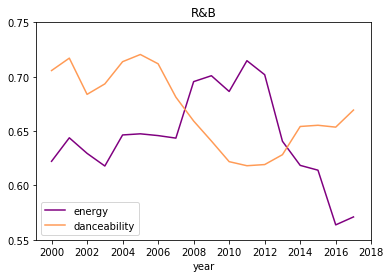

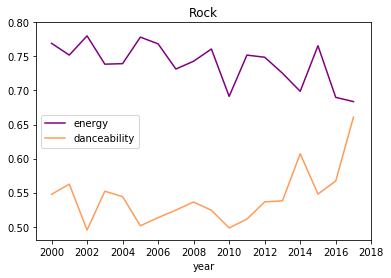

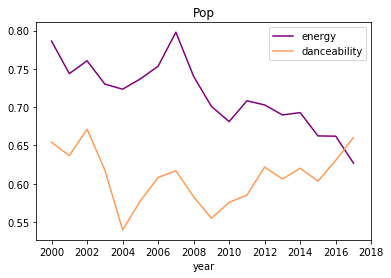

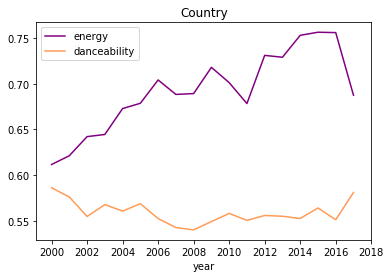

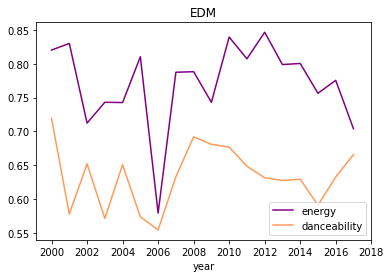

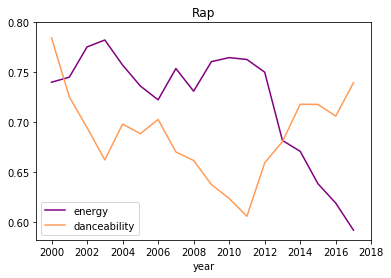

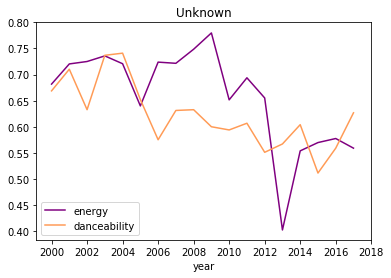

In [6]:
grouped_rb.plot(kind = 'line',y=['energy','danceability'],color = ["purple",'#FF9B56'])
plt.title("R&B")
plt.legend(loc='lower left')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.55,0.6,0.65,0.7,0.75])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("rb_en_da.png")

grouped_rock.plot(kind = 'line',y=['energy','danceability'],color = ["purple",'#FF9B56'])
plt.title("Rock")
plt.legend(loc='center left')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("rock_en_da.png")

grouped_pop.plot(kind = 'line',y=['energy','danceability'],color = ["purple",'#FF9B56'])
plt.title("Pop")
plt.legend(loc='upper right')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.55,0.6,0.65,0.7,0.75,0.8])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("pop_en_da.png")

grouped_country.plot(kind = 'line',y=['energy','danceability'],color = ["purple",'#FF9B56'])
plt.title("Country")
plt.legend(loc='upper left')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.55,0.6,0.65,0.7,0.75])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("country_en_da.png")

grouped_edm.plot(kind = 'line',y=['energy','danceability'],color = ["purple",'#FF9B56'])
plt.title("EDM")
plt.legend(loc='lower right')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.55,0.6,0.65,0.7,0.75,0.8,0.85])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("edm_en_da.png")

grouped_rap.plot(kind = 'line',y=['energy','danceability'],color = ["purple",'#FF9B56'])
plt.title("Rap")
plt.legend(loc='lower left')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.6,0.65,0.7,0.75,0.8])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("rap_en_da.png")

grouped_un.plot(kind = 'line',y=['energy','danceability'],color = ["purple",'#FF9B56'])
plt.title("Unknown")
plt.legend(loc='lower left')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("un_en_da.png")

In [7]:
grouped_rb['duration_ms'].mean()

4.053439622263743

In [8]:
(t_stat, p) = stats.ttest_ind(grouped_rb['acousticness'], grouped_rb['danceability'], equal_var=False)
print(t_stat)
print(p)

-41.46936248946206
1.0589949979188451e-30


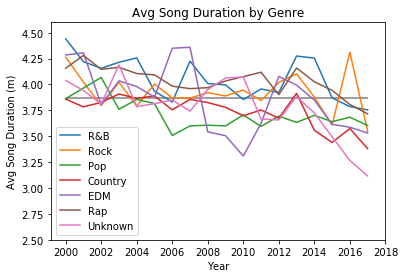

In [9]:
plt.plot(df['year'].unique(),grouped_rb['duration_ms'],label = "R&B")
plt.plot(df['year'].unique(),grouped_rock['duration_ms'],label = "Rock")
plt.plot(df['year'].unique(),grouped_pop['duration_ms'],label = 'Pop')
plt.plot(df['year'].unique(),grouped_country['duration_ms'],label = "Country")
plt.plot(df['year'].unique(),grouped_edm['duration_ms'],label = 'EDM')
plt.plot(df['year'].unique(),grouped_rap['duration_ms'],label = "Rap")
plt.plot(df['year'].unique(),grouped_un['duration_ms'],label = "Unknown")
plt.hlines(df['duration_ms'].mean(),2000, 2017, alpha=0.5,color = 'black')
plt.legend(loc='lower left')
plt.title("Avg Song Duration by Genre")
plt.ylabel("Avg Song Duration (m)")
plt.xlabel("Year")
plt.ylim(2.5,4.6)
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("song_dur.png")

Text(0.5,1,'R&B')

<Figure size 1440x1440 with 0 Axes>

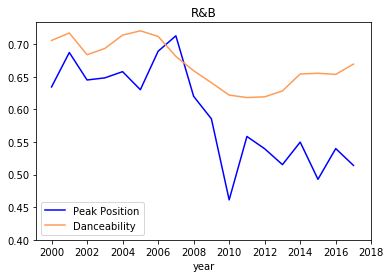

In [10]:
plt.figure(figsize = (20,20))
grouped_rb.plot(kind = 'line',y=['peak_pos','danceability'],label = ['Peak Position','Danceability'],
                color = ["blue",'#FF9B56'])
plt.legend(loc='lower left')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.4,0.45,0.5,0.55,0.6,0.65,0.7])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.title("R&B")

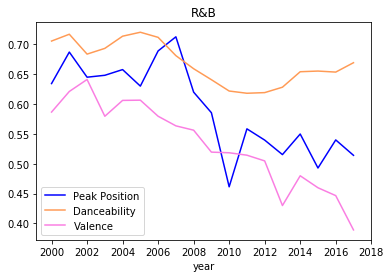

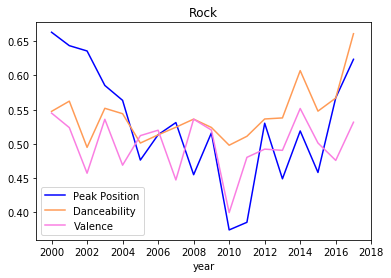

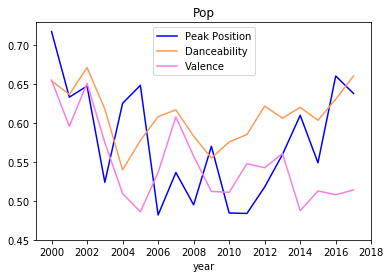

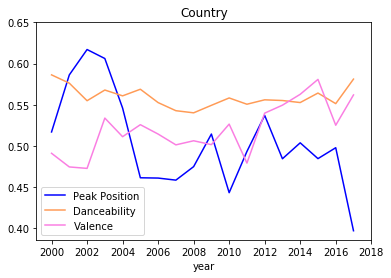

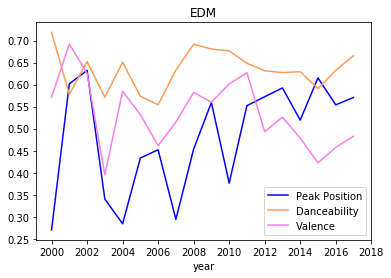

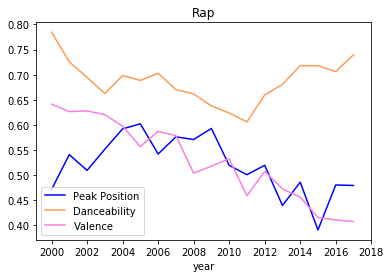

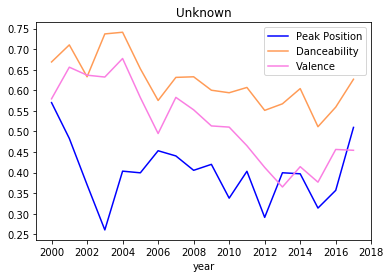

In [11]:

grouped_rb.plot(kind = 'line',y=['peak_pos','danceability','valence'],label = ['Peak Position','Danceability','Valence'],
                color = ["blue",'#FF9B56','#FA7EE2'])
plt.legend(loc='lower left')
plt.title("R&B")
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.4,0.45,0.5,0.55,0.6,0.65,0.7])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("rb_peak_da_va.png")

grouped_rock.plot(kind = 'line',y=['peak_pos','danceability','valence'],label = ['Peak Position','Danceability','Valence'],
                 color = ["blue",'#FF9B56','#FA7EE2'])
plt.legend(loc='lower left')
plt.title("Rock")
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.4,0.45,0.5,0.55,0.6,0.65])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("rock_peak_da_va.png")

grouped_pop.plot(kind = 'line',y=['peak_pos','danceability','valence'],label = ['Peak Position','Danceability','Valence'],
                color = ["blue",'#FF9B56','#FA7EE2'])
plt.legend(loc='upper center')
plt.title("Pop")
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.45,0.5,0.55,0.6,0.65,0.7])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("pop_peak_da_va.png")

grouped_country.plot(kind = 'line',y=['peak_pos','danceability','valence'],label = ['Peak Position','Danceability','Valence'],
                    color = ["blue",'#FF9B56','#FA7EE2'])
plt.legend(loc='lower left')
plt.title("Country")
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.4,0.45,0.5,0.55,0.6,0.65])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("country_peak_da_va.png")

grouped_edm.plot(kind = 'line',y=['peak_pos','danceability','valence'],label = ['Peak Position','Danceability','Valence'],
                color = ["blue",'#FF9B56','#FA7EE2'])
plt.legend(loc='lower right')
plt.title("EDM")
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("edm_peak_da_va.png")

grouped_rap.plot(kind = 'line',y=['peak_pos','danceability','valence'],label = ['Peak Position','Danceability','Valence'],
                color = ["blue",'#FF9B56','#FA7EE2'])
plt.legend(loc='lower left')
plt.title("Rap")
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("rap_peak_da_va.png")

grouped_un.plot(kind = 'line',y=['peak_pos','danceability','valence'],label = ['Peak Position','Danceability','Valence'],
                color = ["blue",'#FF9B56','#FA7EE2'])
plt.legend(loc='upper right')
plt.title("Unknown")
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
plt.yticks([0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75])
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.savefig("un_peak_da_va.png")


In [12]:
# grouped_rb.plot(kind = 'line',y=['acousticness','danceability'])
# plt.title("R&B")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_rock.plot(kind = 'line',y=['acousticness','danceability'])
# plt.title("Rock")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_pop.plot(kind = 'line',y=['acousticness','danceability'])
# plt.title("Pop")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_country.plot(kind = 'line',y=['acousticness','danceability'])
# plt.title("Country")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_edm.plot(kind = 'line',y=['acousticness','danceability'])
# plt.title("EDM")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_rap.plot(kind = 'line',y=['acousticness','danceability'])
# plt.title("Rap")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [13]:
# grouped_rb.plot(kind = 'line',y=['loudness','danceability'])
# plt.title("R&B")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_rock.plot(kind = 'line',y=['loudness','danceability'])
# plt.title("Rock")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_pop.plot(kind = 'line',y=['loudness','danceability'])
# plt.title("Pop")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_country.plot(kind = 'line',y=['loudness','danceability'])
# plt.title("Country")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_edm.plot(kind = 'line',y=['loudness','danceability'])
# plt.title("EDM")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# grouped_rap.plot(kind = 'line',y=['loudness','danceability'])
# plt.title("Rap")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
# plt.figure(figsize = (50,50))
# grouped_rb.plot(kind = 'line',y=['peak_pos','danceability'],label = ['Peak Position','Danceability'],
#                 color = ["blue",'orange','green'])
# plt.legend(loc='lower left')
# plt.title("R&B")

# plt.savefig("rb_peak_da.png")
# grouped_rock.plot(kind = 'line',y=['peak_pos','danceability'],label = ['Peak Position','Danceability'],
#                  color = ["blue",'orange','green'])
# plt.legend(loc='lower left')
# plt.title("Rock")
# plt.savefig("rock_peak_da.png")
# grouped_pop.plot(kind = 'line',y=['peak_pos','danceability'],label = ['Peak Position','Danceability'],
#                 color = ["blue",'orange','green'])
# plt.legend(loc='lower left')
# plt.title("Pop")
# plt.savefig("pop_peak_da.png")
# grouped_country.plot(kind = 'line',y=['peak_pos','danceability'],label = ['Peak Position','Danceability'],
#                     color = ["blue",'orange','green'])
# plt.legend(loc='lower left')
# plt.title("Country")
# plt.savefig("country_peak_da.png")
# grouped_edm.plot(kind = 'line',y=['peak_pos','danceability'],label = ['Peak Position','Danceability'],
#                 color = ["blue",'orange','green'])
# plt.legend(loc='lower right')
# plt.title("EDM")
# plt.savefig("edm_peak_da.png")
# grouped_rap.plot(kind = 'line',y=['peak_pos','danceability'],label = ['Peak Position','Danceability'],
#                 color = ["blue",'orange','green'])
# plt.legend(loc='lower left')
# plt.title("Rap")
# plt.savefig("rap_peak_da.png")

In [15]:
# grouped_rb.plot(kind = 'line',y=['valence','peak_pos'],colors = ["pink",'blue'])
# plt.title("R&B")
# plt.legend(loc='lower left')
# plt.savefig("rb_va_peak.png")
# grouped_rock.plot(kind = 'line',y=['valence','peak_pos'],colors = ["pink",'blue'])
# plt.title("Rock")
# plt.legend(loc='lower left')
# plt.savefig("rock_va_peak.png")
# grouped_pop.plot(kind = 'line',y=['valence','peak_pos'],colors = ["pink",'blue'])
# plt.title("Pop")
# plt.legend(loc='upper right')
# plt.savefig("pop_va_peak.png")
# grouped_country.plot(kind = 'line',y=['valence','peak_pos'],colors = ["pink",'blue'])
# plt.title("Country")
# plt.legend(loc='lower left')
# plt.savefig("country_va_peak.png")
# grouped_edm.plot(kind = 'line',y=['valence','peak_pos'],colors = ["pink",'blue'])
# plt.title("EDM")
# plt.legend(loc='lower right')
# plt.savefig("edm_va_peak.png")
# grouped_rap.plot(kind = 'line',y=['valence','peak_pos'],colors = ["pink",'blue'])
# plt.title("Rap")
# plt.legend(loc='lower left')
# plt.savefig("rap_va_peak.png")

In [16]:
# rb_mean = grouped_rb['duration_ms'].mean()
# grouped_rb.plot(kind = 'line',y=['duration_ms'],label = ['Avg Song Duration'],
#                 colors = ['green'])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title("R&B")
# plt.hlines(grouped_rb['duration_ms'].mean(),1999, 2020, alpha=0.25)
# grouped_rock.plot(kind = 'line',y=['duration_ms'],label = ['Avg Song Duration'],
#                 colors = ['green'])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title("Rock")
# plt.hlines(grouped_rock['duration_ms'].mean(),1999, 2020, alpha=0.25)
# grouped_pop.plot(kind = 'line',y=['duration_ms'],label = ['Avg Song Duration'],
#                 colors = ['green'])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title("Pop")
# plt.hlines(grouped_pop['duration_ms'].mean(),1999, 2020, alpha=0.25)
# grouped_country.plot(kind = 'line',y=['duration_ms'],label = ['Avg Song Duration'],
#                 colors = ['green'])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title("Country")
# plt.hlines(grouped_country['duration_ms'].mean(),1999, 2020, alpha=0.25)
# grouped_edm.plot(kind = 'line',y=['duration_ms'],label = ['Avg Song Duration'],
#                 colors = ['green'])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title("EDM")
# plt.hlines(grouped_edm['duration_ms'].mean(),1999, 2020, alpha=0.25)
# grouped_rap.plot(kind = 'line',y=['duration_ms'],label = ['Avg Song Duration'],
#                 colors = ['green'])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title("Rap")
# plt.hlines(grouped_rap['duration_ms'].mean(),1999, 2020, alpha=0.25)

In [17]:
# grouped_rb.plot(kind = 'line',y=['valence','danceability'],color = ["pink",'orange'],
#                 label=['Valence','Danceability'])
# plt.title("R&B")
# plt.legend(loc='lower left')
# plt.savefig("rb_va_da.png")
# grouped_rock.plot(kind = 'line',y=['valence','danceability'],color = ["pink",'orange'],
#                  label=['Valence','Danceability'])
# plt.title("Rock")
# plt.legend(loc='lower left')
# plt.savefig("rock_va_da.png")
# grouped_pop.plot(kind = 'line',y=['valence','danceability'],color = ["pink",'orange'],
#                 label=['Valence','Danceability'])
# plt.title("Pop")
# plt.legend(loc='upper center')
# plt.savefig("pop_va_da.png")
# grouped_country.plot(kind = 'line',y=['valence','danceability'],color = ["pink",'orange'],
#                     label=['Valence','Danceability'])
# plt.title("Country")
# plt.legend(loc='lower right')
# plt.savefig("country_va_da.png")
# grouped_edm.plot(kind = 'line',y=['valence','danceability'],color = ["pink",'orange'],
#                 label=['Valence','Danceability'])
# plt.title("EDM")
# plt.legend(loc='upper right')
# plt.savefig("edm_va_da.png")
# grouped_rap.plot(kind = 'line',y=['valence','danceability'],color = ["pink",'orange'],
#                 label=['Valence','Danceability'])
# plt.title("Rap")
# plt.legend(loc='lower left')
# plt.savefig("rap_va_da.png")